# Circuit satisfiability analyse

In dit document worden de resultaten uit de getimede testen van het circuit satisfiability programma uitgewerkt. Allereerst wordt het csv-bestand waarin alle resultaten staan ingelezen om hierna de asses te selecteren om uiteindelijk de grafiek te plotten.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_data = pd.read_csv('speed_test.csv')
df_data

,Method,Number of Processes,Time,Solutions
0,Sequential,1,371.80,81
1,Parallel,2,188.90,81
2,Parallel,4,124.76,81
3,Parallel,8,127.20,81
4,Parallel,16,137.90,81
5,Parallel,32,131.84,81
6,Parallel,64,131.87,81
7,Parallel,128,139.28,81


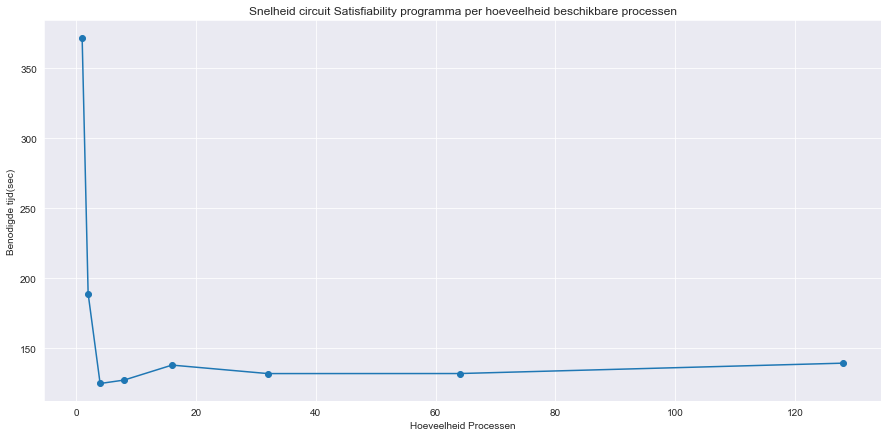

In [3]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 7))

# plot the time for every amount of processes
x = df_data[['Number of Processes']]
y = df_data[['Time']]

plt.scatter(x,y)
plt.plot(x,y)

# add title and x, y labels
plt.title("Snelheid circuit Satisfiability programma per hoeveelheid beschikbare processen")
plt.xlabel("Hoeveelheid Processen")
plt.ylabel("Benodigde tijd(sec)")

plt.show()

## analyse grafiek

Zoals in de grafiek te zien is doet het algoritme er ongeveer 370 seconden over wanneer hij sequentieel met maar één proces gedraaid wordt. Wanneer het programma in meerdere processen verdeeld wordt valt er terug te zien in de grafiek dat bij twee beschikbare processen nog maar de helft van de tijd nodig is en bij vier beschikbare processen nog maar eenderde van de hoeveelheid tijd.  
Echter houdt de 'speedup' van het algoritme vanaf vier beschikbare processen op. In de grafiek valt af te lezen dat de benodigde tijd om het programma te draaien vanaf 4 beschikbare processen redelijk gelijk trekt en de benodigde tijd dus ook redelijk gelijk blijft.  

Een eventuele onderbouwing voor dit fenomeen zou dan ook kunnen zijn dat de Virtuele machine waarmee ik het programma gedraait en getimed heb maar toegang heeft tot 3 cores. Hierdoor kan het systeem dan ook maar constant 3 processen tegelijkertijd draaien, wat dit verschijnsel zou verklaren.  

Wanneer er gevraagd wordt voor meer processen dan dat er beschikbare cores zijn zal MPI het programma alsnog draaien, echter zal het programma dan draaien met een verminderde efficiëntie. Dit valt ook terug te lezen in de grafiek, aangezien naarmate het programma met meer processen gedraaid wordt de benodigde tijd iets meer toeneemt.